# **SQL Python Project - Voting Application**

<span style="font-family:'Times News Romans'">Write a program to count votes for the US elections from provided vote data.</span>

# <span style="font-family:'Times News Romans'"> The program should:</span>
    -- Read the text file and verify that each voter is a registered elector.
    -- If the voter exists, add their vote to the designated table; otherwise, ignore it and display a message.
    -- Once all votes are verified and added to the table, tally the votes for each candidate.
    -- Display the number of votes for each candidate, then announce the winner of the election.
# <span style="font-family:'Times New Roman'">Instructions:</span>
    -- Use the sample database that serves as the reference for vote data.
    -- The database contains two tables: "voters" (valid electors), "votes" (registered votes).
    -- If you want to view its content, make queries or use a graphical client (as seen in the courses).
    -- The voter verification will simply be based on the existence of their first name and last name in the electors' table.


In [5]:
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
connection = sqlite3.connect('electus.db')
dataset = pd.read_sql('SELECT * FROM voters', connection)

connection.close()

dataset

,id,firstname,lastname,birthdate
0,1,Angela,Thompson,1982-04-01
1,2,Jason,Beck,1956-05-05
2,3,Evan,Evans,1942-10-11
3,4,Sarah,Cannon,1984-11-19
4,5,Briana,Nguyen,2002-09-18
...,...,...,...,...
195,196,Diana,Freeman,1960-07-18
196,197,Meghan,Gomez,1988-12-16
197,198,Matthew,Wilson,1960-07-16
198,199,Anthony,Davis,2001-12-15


In [10]:
with open ('votes.txt', 'r') as file:
    content = file.read()
    
    print(content)



James Schwartz;Texas;K
Billy Stephens;Michigan;K
Charles Robertson;Illinois;T
William Morris;Ohio;K
Jason Anderson;Ohio;T
Krista Werner;Ohio;T
Anthony Johnson;Illinois;K
Daniel Thompson;Florida;K
Justin Bryant;California;T
Anthony Olson;Illinois;K
Jacob Edwards;Ohio;T
Monica Mcdaniel;Nevada;T
Erik Bailey;Nevada;T
Scott Woods;Michigan;T
Joshua Mcbride;Arizona;T
Jared Larsen;Arizona;K
Misty Patel;Arizona;K
Michael Whitaker;Texas;T
Alex Farrell;California;K
Casey Owens;Michigan;T
James Schwartz;Ohio;T
Tami Robinson;Washington;T
Sara Brown;Michigan;K
Erik Bailey;Florida;T
Teresa Schneider;Washington;K
Daniel Thompson;Ohio;T
Kayla Wood;Ohio;K
Melanie Jones;Ohio;K
Carla Rodriguez;Florida;T
Loretta Perez;New York;T
Sabrina Butler;Nevada;T
Andrew Shaw;Michigan;T
Kelli Collins;New York;K
Carrie Hall;Texas;K
Matthew Monroe;Florida;T
John Morrison;Michigan;K
Margaret Johnson;Florida;T
Kevin Gray;Michigan;K
Tami Robinson;Washington;T
Stephen Smith;New York;K
Jacob Shaw;Illinois;K
James Schwartz;Ar

In [11]:


db_path = 'electus.db'
ignored_count = 0  # Initialize ignored votes counter

with sqlite3.connect(db_path) as connectors:
    try:
        cursor = connectors.cursor()
     
        # Open and read the votes file
        with open('votes.txt', 'r') as votes_file:
            for line in votes_file:
                line = line.strip()  # Strip whitespace
                name, state, vote = line.split(';')  # Split line by ';'
                firstname, lastname = name.split(' ')  # Split first and last names
                
                # Check if voter exists in the database
                cursor.execute('SELECT id FROM voters WHERE firstname = ? AND lastname = ?', (firstname, lastname))
                voter = cursor.fetchone()
                
                if voter:
                    # Insert vote if the voter exists
                    cursor.execute('INSERT INTO votes(candidate) VALUES (?)', (vote,))
                else:
                    ignored_count += 1  # Increment ignored count if voter is not found
                    print(f'Vote of {firstname} {lastname} ignored.')
        
        connectors.commit()  # Commit all changes
        
        # Count votes for each candidate
        cursor.execute('SELECT candidate, COUNT(*) FROM votes GROUP BY candidate')
        results = cursor.fetchall()
        
        # Store results in a dictionary
        votes_count = {row[0]: row[1] for row in results}
        
        # Retrieve votes for specific candidates
        trump_votes = votes_count.get('T', 0)
        kamala_votes = votes_count.get('K', 0)
        
        # Display results
        print(f'Number of votes for Trump: {trump_votes}')
        print(f'Number of votes for Kamala: {kamala_votes}')
        print(f'Number of votes ignored: {ignored_count}')
        
        # Determine the winner
        if trump_votes > kamala_votes:
            print('Trump is elected president!')
        elif trump_votes < kamala_votes:
            print('Kamala is the president!')
        else:
            print('There are no winners, proceeding to a second round.')
            
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
        connectors.rollback()


Vote of Jamie Cervantes ignored.
Vote of Linda Murphy ignored.
Vote of James Ellis ignored.
Vote of Timothy Villanueva ignored.
Vote of Tammy Martin ignored.
Vote of Angela Harrison ignored.
Vote of David Mccullough ignored.
Vote of Trevor Williams ignored.
Vote of Marissa Espinoza ignored.
Vote of Sean Henry ignored.
Vote of Dennis Reilly ignored.
Vote of Jasmin Miles ignored.
Vote of Debra Day ignored.
Vote of Mark Fry ignored.
Vote of Emma Schneider ignored.
Vote of Robert Friedman ignored.
Vote of Alexis Moore ignored.
Vote of Evan Taylor ignored.
Vote of Evan Jennings ignored.
Vote of Brenda Stevens ignored.
Vote of Andrea Harris ignored.
Vote of Stephen York ignored.
Vote of Christopher Rogers ignored.
Vote of Ashley Schultz ignored.
Vote of Gregory Bowers ignored.
Vote of Janice Doyle ignored.
Vote of John Barnett ignored.
Vote of Gregory Trevino ignored.
Vote of Emily Ramirez ignored.
Vote of Megan Leach ignored.
Vote of Nicole Long ignored.
Vote of Tracy Fisher ignored.
Vote o

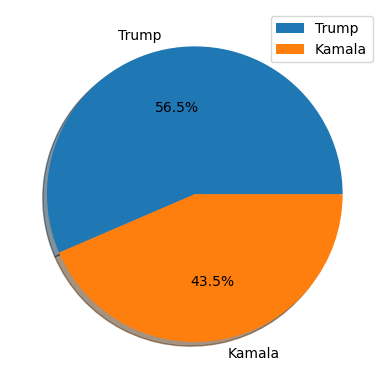

In [17]:
figure, ax = plt.subplots()

canditate = ['Trump', 'Kamala']
votes_size = [trump_votes, kamala_votes]

ax.pie(votes_size, labels=canditate, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

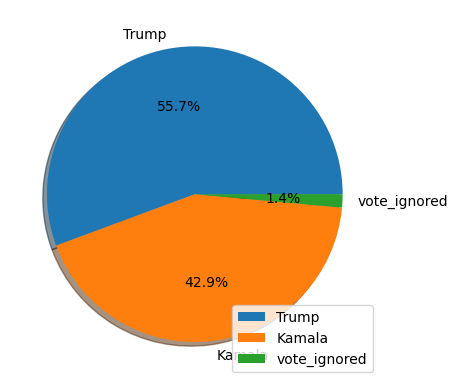

In [16]:
figure, ax = plt.subplots()

canditate = ['Trump', 'Kamala', 'vote_ignored']
votes_size = [trump_votes, kamala_votes, ignored_count]

ax.pie(votes_size, labels=canditate, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()